In [1]:
import pandas as pd
from neuralprophet import NeuralProphet, set_log_level
import energy_utils as eu

In [2]:
lon = -105
lat = 40

columns = ['ghi', 'air_temperature']
#columns = ['ghi', 'dhi', 'air_temperature', 
#           'wind_speed', 'relative_humidity', 
#           'surface_pressure', 'clearsky_ghi']

_, time_series = eu.timeseries(lon=lon, lat=lat, years=['2019', '2020'], columns=columns)

In [3]:
time_series

,ghi,air_temperature
2019-01-01 00:00:00,0.0,-12.2
2019-01-01 00:30:00,0.0,-12.5
2019-01-01 01:00:00,0.0,-12.8
2019-01-01 01:30:00,0.0,-13.2
2019-01-01 02:00:00,0.0,-13.5
...,...,...
2020-12-31 21:30:00,304.0,3.4
2020-12-31 22:00:00,201.0,2.1
2020-12-31 22:30:00,114.0,0.0
2020-12-31 23:00:00,50.0,-2.1


In [4]:
df = pd.DataFrame()
df['ds'] = time_series.index
df['y'] = time_series['ghi'].values
df['air_temp'] = time_series['air_temperature'].values

In [5]:
NeuralProphet?

In [6]:
m = NeuralProphet(
    n_lags=96,
    ar_sparsity=1,
    n_changepoints=10,
    changepoints_range=0.8,
    yearly_seasonality=True,
    weekly_seasonality=False,
    num_hidden_layers = 3,
    d_hidden=20,
    learning_rate=0.005,
    epochs=100
)
m = m.add_lagged_regressor('air_temp')

df_train, df_val = m.split_df(df, freq='30min', valid_p=0.01)

metrics = m.fit(df_train, freq='30min', valid_p=0.2)

INFO - (NP.config.set_auto_batch_epoch) - Auto-set batch_size to 64
INFO:NP.config:Auto-set batch_size to 64
Epoch[100/100]: 100%|██████████| 100/100 [02:12<00:00,  1.33s/it, SmoothL1Loss=0.00132, MAE=17.8, MSE=1.86e+3, RegLoss=0]


In [7]:
m.config_train.learning_rate

0.005

In [8]:
m.test(df_val)

INFO - (NP.forecaster._evaluate) - Validation metrics:    SmoothL1Loss    MAE     MSE
1         0.000  9.349 484.635
INFO:NP.forecaster:Validation metrics:    SmoothL1Loss    MAE     MSE
1         0.000  9.349 484.635


,SmoothL1Loss,MAE,MSE
0,0.000344,9.348606,484.635376


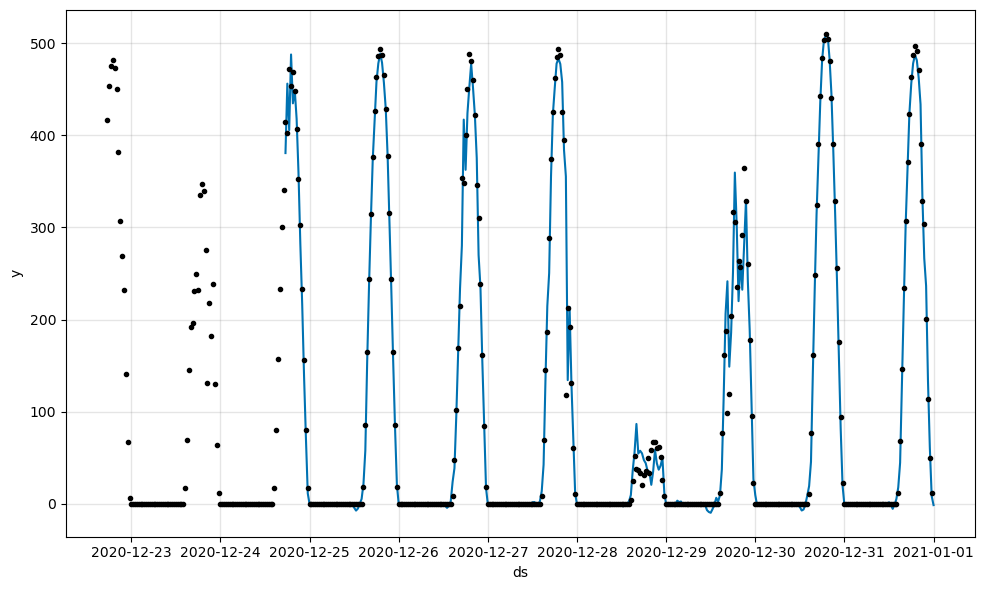

In [9]:
future = m.make_future_dataframe(df_val, n_historic_predictions=True)
forecast = m.predict(future)
m.plot(forecast) 

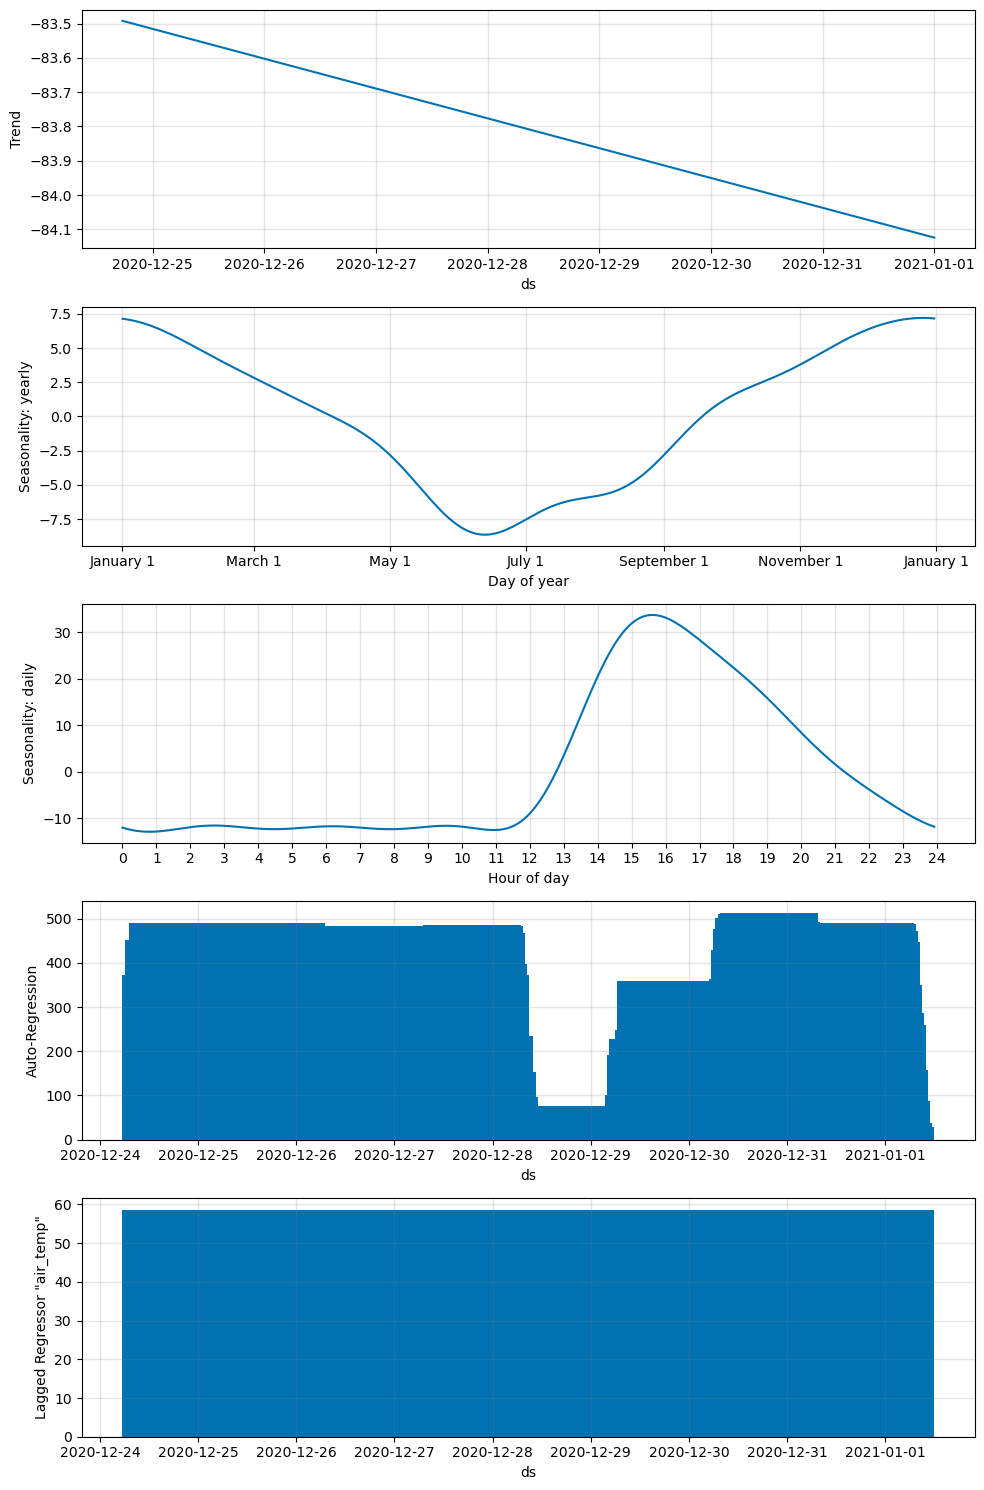

In [10]:
m.plot_components(forecast)

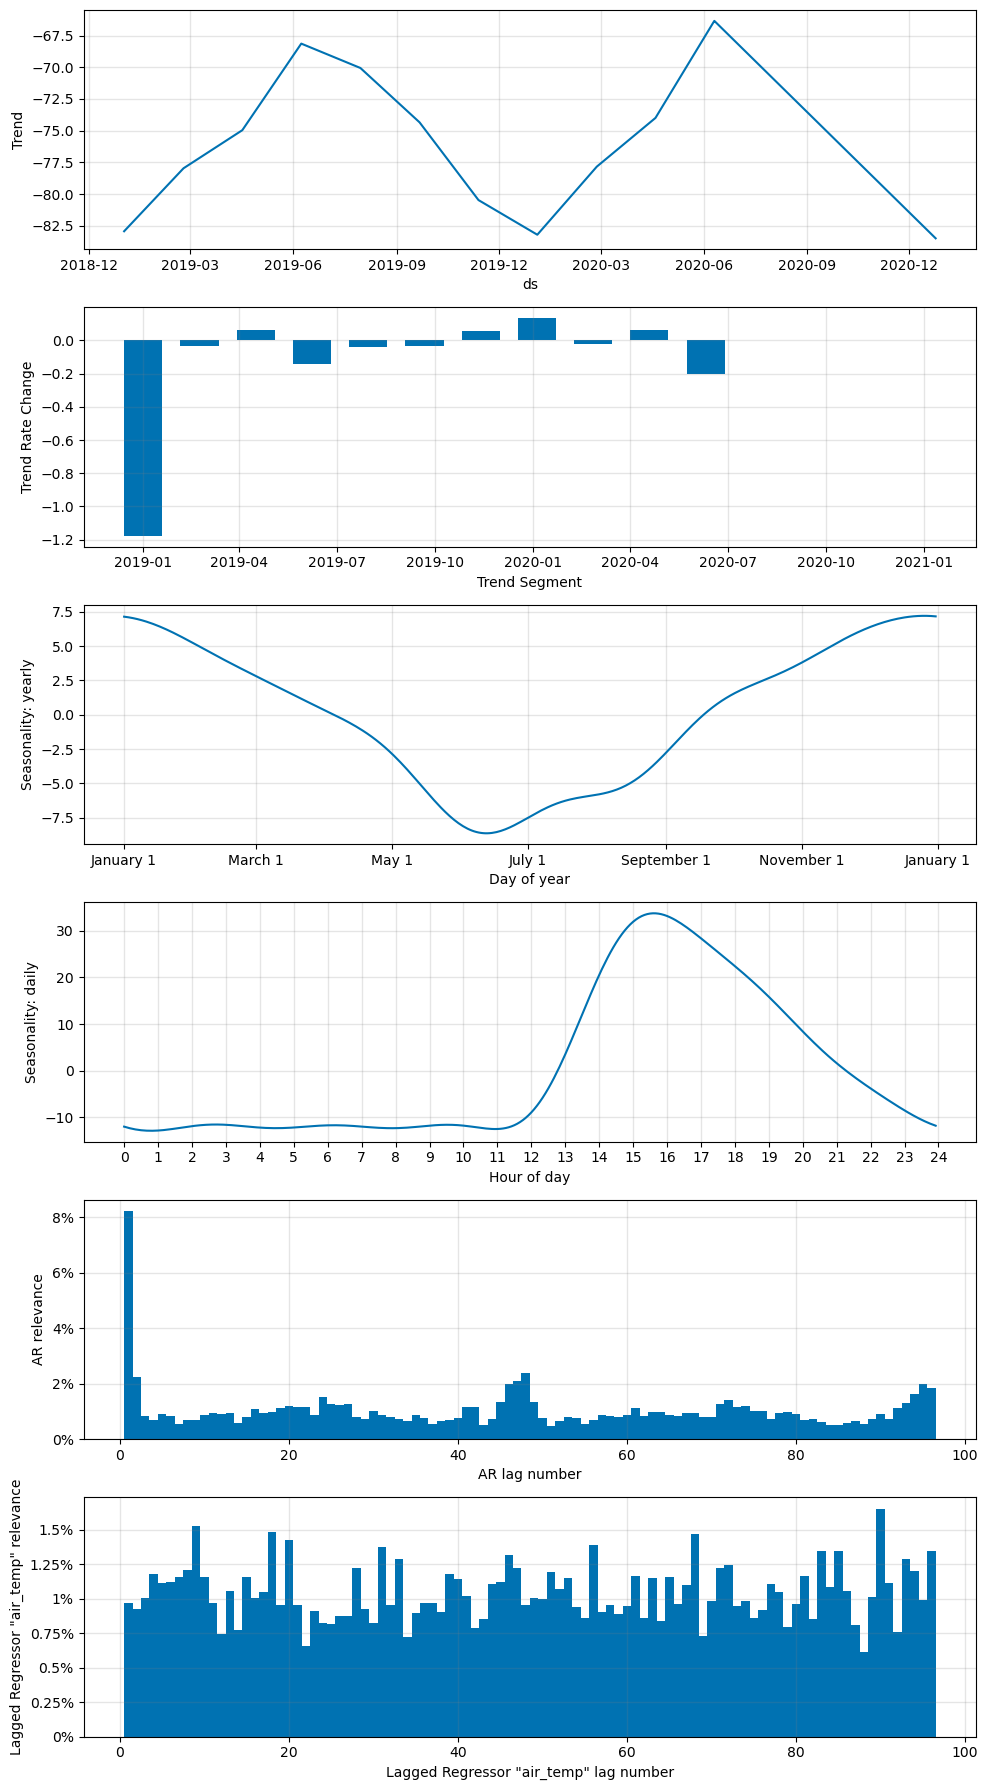

In [11]:
m.plot_parameters()

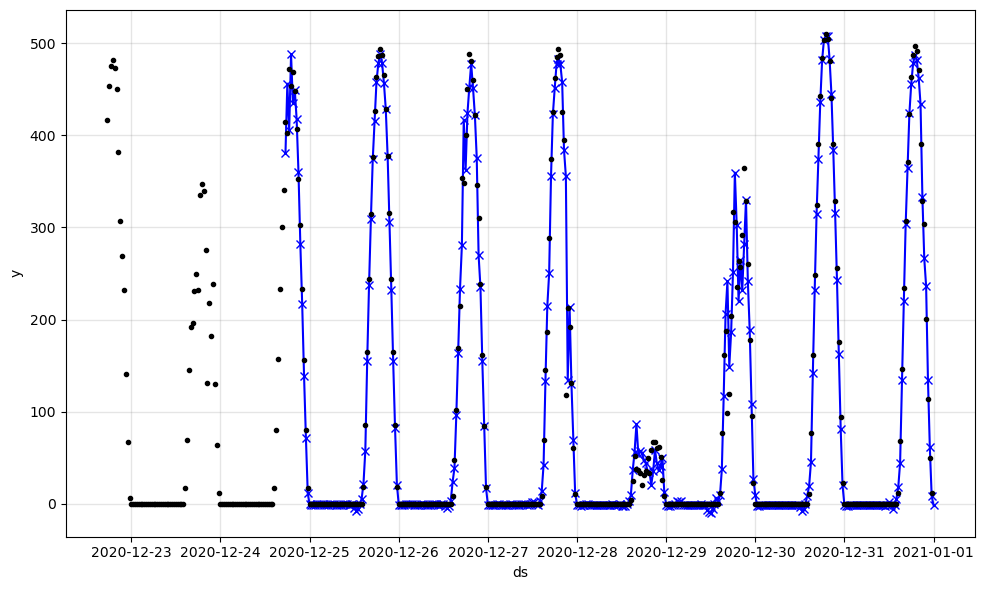

In [12]:
m.highlight_nth_step_ahead_of_each_forecast(1).plot(forecast)

WARNING - (py.warnings._showwarnmsg) - /opt/anaconda3/envs/prophet/lib/python3.7/site-packages/neuralprophet/utils.py:388: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  df[forecast_name] = None

  df[forecast_name] = None



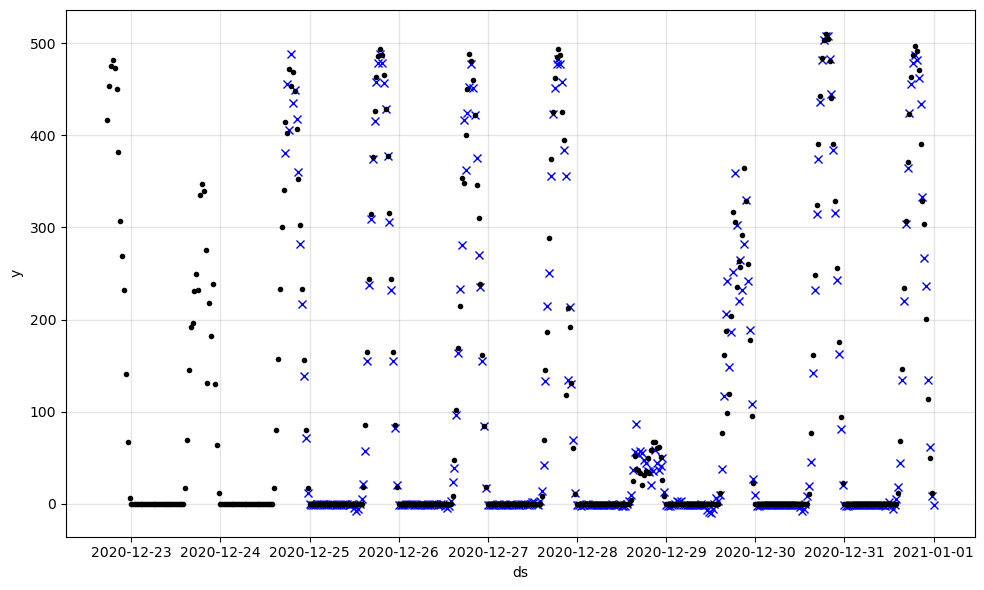

In [13]:
m.plot_last_forecast(forecast, include_previous_forecasts=len(df_val))

In [20]:
from sklearn.model_selection import ParameterGrid
params_grid = {#'seasonality':('multiplicative','additive'),
               'changepoint_prior_scale':[0.1, 0.9],
              'n_lags':[48, 96],
              'n_changepoints' : [10, 100],
              'num_hidden_layers': [2, 3],
              'd_hidden': [10, 20],
              'learning_rate': [0.001, 0.01],
              'epochs': [50, 100]}
grid = ParameterGrid(params_grid)
cnt = 0
for p in grid:
    cnt = cnt+1

print('Total Possible Models',cnt)


Total Possible Models 128


In [ ]:
m = NeuralProphet(
    n_lags=96,
    ar_sparsity=1,
    n_changepoints=10,
    changepoints_range=0.8,
    yearly_seasonality=True,
    weekly_seasonality=False,
    num_hidden_layers = 3,
    d_hidden=20,
    learning_rate=0.005,
    epochs=100
)
m = m.add_lagged_regressor('air_temp')

df_train, df_val = m.split_df(df, freq='30min', valid_p=0.01)

metrics = m.fit(df_train, freq='30min', valid_p=0.2)